<a href="https://colab.research.google.com/github/AllanBottino/Series_Temporais/blob/main/S%C3%A9ries_Temporais_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-Importando as bibliotecas:

In [1]:
import pandas as pd

# O comando abaixo tira umas mensagens chatas.
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import warnings
warnings.filterwarnings("ignore")

2-Carregando os arquivos:

In [2]:
# Vamos carregar os dois arquivos:

#train=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_train.csv")
#test=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_test.csv")

from google.colab import files
uploaded = files.upload()

Saving store_item_demand_test.csv to store_item_demand_test.csv
Saving store_item_demand_train.csv to store_item_demand_train.csv


In [3]:
import io

train = pd.read_csv(io.BytesIO(uploaded['store_item_demand_train.csv']))

test = pd.read_csv(io.BytesIO(uploaded['store_item_demand_test.csv']))

In [4]:
train = pd.read_csv(io.BytesIO(uploaded['store_item_demand_train.csv']))

test = pd.read_csv(io.BytesIO(uploaded['store_item_demand_test.csv']))

df = pd.concat([train, test])

df.drop("id", axis =1, inplace = True)

df1 = df.copy()

df1.head(1)

,date,store,item,sales
0,2013-01-01,1,1,13.0


Acima eu copiei o dataframe original (df) no df1, minha impressão é que fazer cópias do arquivo original é uma prática que te salva de muitos acidentes.

# 2-1- Carregando os arquivos de outra forma: 

In [5]:
# df1 = pd.read_csv("store_item_demand_forecasting", index_col = "date", parse_dates=['date'])


Supondo que você está usando o jupyter notebook, poderia colocar junto ao comando read_csv, os parametros:

index_col = "date"
Que irá colocar a coluna date ou outra que você desejar como índice.

parse_dates=['date'])
Estou transformando a coluna date para o formato datetime.

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [6]:
#train = pd.read_csv(io.BytesIO(uploaded['store_item_demand_train.csv']), index_col = "date", parse_dates=True)

#test = pd.read_csv(io.BytesIO(uploaded['store_item_demand_test.csv']), index_col = "date", parse_dates=True)

#df1 = pd.concat([train, test])

#df1.head()

O método acima é só uma incrementação com os dois parametros já explicados para caso alguém esteja carregando o arquivo como eu carrego e queira fazer igual, aí está, mas eu não vou fazer deste modo, pois quero mostrar o processo de outro jeito, como poderão ver abaixo. 

#3-Transformando e criando datas:

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    958000 non-null  object 
 1   store   958000 non-null  int64  
 2   item    958000 non-null  int64  
 3   sales   913000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 36.5+ MB


A primeira coisa a se fazer em uma análise de séries temporais é a conversão da coluna "date" para o tipo datetime. Pois como podem ver a coluna "date" está como "object". Para isso vamos usar a função pd.to_datetime():



In [8]:
df1['date'] = pd.to_datetime(df1['date'],errors='coerce' )

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    958000 non-null  datetime64[ns]
 1   store   958000 non-null  int64         
 2   item    958000 non-null  int64         
 3   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 36.5 MB


Agora vamos colocar a coluna "date" como a coluna indexadora dos demais utilizando o comando DataFrame.set_index().

errors='coerce' uma dica que eu deixo é mantenham sempre esse comando quando forem converter, pois as vezes não converte, ou dá algum problema e você fica batendo cabeça, quando na verdade, por algum motivo o arquivo não foi convertido.

No nosso caso foi convertido corretamente.

In [9]:
df1.set_index('date', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 958000 entries, 2013-01-01 to 2018-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   store   958000 non-null  int64  
 1   item    958000 non-null  int64  
 2   sales   913000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 29.2 MB


Como podem ver, a coluna date não está mais lá, agora, ao invés de "Int64Index: 958000 entries, 0 to 44999" nós temos: DatetimeIndex: 958000 entries, 2013-01-01 to 2018-03-31.

In [10]:
df1.head()

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0


In [11]:
df1.tail()

,store,item,sales
date,,,
2018-03-27,10,50,NaN
2018-03-28,10,50,NaN
2018-03-29,10,50,NaN
2018-03-30,10,50,NaN
2018-03-31,10,50,NaN


In [12]:
df1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', name='date', length=958000, freq=None)

Acima podemos ver aonde começa o nosso indice baseado na data e aonde ele termina.

In [13]:
# df1 = df1.reset_index (drop = False)
# df1.head()

Acima está um comando para caso vocês (eu também) precisem resetar/tirar o indice de onde está e voltar a ser uma simples coluna.

In [14]:
# df1['year'] = df.date.dt.year 

# df1['month'] = df.date.dt.month 

# df1['week'] = df.date.dt.week

# df1['weekday'] = df.date.dt.weekday      

# df1.head()

O comando acima, eu crio a coluna "year" (ano), "month" (mês) e etc usando o método datetime, a vantagem é que o arquivo fica divido por colunas e você pode acessar tudo relacionado ao ano (por exemplo) e combinar com outras colunas.


Aqui nesse projeto eu fiz bastante disso como podem ver:

https://www.linkedin.com/feed/update/urn%3Ali%3Aactivity%3A6783774226194296832/



# 4 - Indexação baseada em tempo:

Uma série temporal se baseia na indexação baseada em tempo - usando datas e horas para organizar e acessar intuitivamente nossos dados. Com a indexação baseada em tempo, podemos usar strings formatadas de data / hora para selecionar dados em nosso DataFrame.

A indexação funciona de maneira semelhante à indexação baseada em "rótulo padrão", ou seja "Loc".

Por exemplo, podemos selecionar dados para um único dia usando uma string como '2013-01-01"

# 4-1 Loc:

In [15]:
a = df1.loc['2013-01-01']

print(a.head(2))

            store  item  sales
date                          
2013-01-01      1     1   13.0
2013-01-01      2     1   12.0


Como também podemos selecionar um intervalo de tempo:

In [16]:
b = df1.loc['2013-01-01':'2014-01-12']

print(b.head(2))# Os dois primeiros.
print(b.tail(2))# Os dois últimos.

            store  item  sales
date                          
2013-01-01      1     1   13.0
2013-01-02      1     1   11.0
            store  item  sales
date                          
2014-01-11     10    50   57.0
2014-01-12     10    50   59.0


Também podemos fazer deste jeito só para ver o sales:

In [17]:
c = df1.loc['2013-01' : "2013-06", "sales"]

print(c.head())
print(c.tail())
#print(c)

date
2013-01-01    13.0
2013-01-02    11.0
2013-01-03    14.0
2013-01-04    13.0
2013-01-05    10.0
Name: sales, dtype: float64
date
2013-06-26    64.0
2013-06-27    57.0
2013-06-28    62.0
2013-06-29    84.0
2013-06-30    79.0
Name: sales, dtype: float64


Também podemos descobrir a média (mean()), soma(sum)), o valor máximo(max()) e etc.
### Como podem ver os cálculos foram feitos encima dos cinco primeiros valores (head())


In [18]:
c = df1.loc['2013-01' : "2013-06", "sales"]

print(c.head().mean())
print(c.head().sum())
print(c.head().max())

print(c)

12.2
61.0
14.0
date
2013-01-01    13.0
2013-01-02    11.0
2013-01-03    14.0
2013-01-04    13.0
2013-01-05    10.0
              ... 
2013-06-26    64.0
2013-06-27    57.0
2013-06-28    62.0
2013-06-29    84.0
2013-06-30    79.0
Name: sales, Length: 90500, dtype: float64


In [19]:
c = df1.loc['2013-01' : "2013-06"]

d = c.sales.mean()
e = c.sales.sum()
f = c.sales.max()

print(d)
print(e)
print(f)

41.68857458563536
3772816.0
157.0


Também podemos fazer desta maneira que também fica bom:

In [20]:
df1.index
print(df1.loc['2013'].head())
print(df1.loc['2013-01'].head())
print(df1.loc['2013-01-01': '2014-01-12'])

            store  item  sales
date                          
2013-01-01      1     1   13.0
2013-01-02      1     1   11.0
2013-01-03      1     1   14.0
2013-01-04      1     1   13.0
2013-01-05      1     1   10.0
            store  item  sales
date                          
2013-01-01      1     1   13.0
2013-01-02      1     1   11.0
2013-01-03      1     1   14.0
2013-01-04      1     1   13.0
2013-01-05      1     1   10.0
            store  item  sales
date                          
2013-01-01      1     1   13.0
2013-01-02      1     1   11.0
2013-01-03      1     1   14.0
2013-01-04      1     1   13.0
2013-01-05      1     1   10.0
...           ...   ...    ...
2014-01-08     10    50   33.0
2014-01-09     10    50   45.0
2014-01-10     10    50   48.0
2014-01-11     10    50   57.0
2014-01-12     10    50   59.0

[188500 rows x 3 columns]


Um exemplo com gráfico:

*Neste exemplo eu vou usar apenas o item 1 da store 1 para analise, pois esse gráfico é um montro de grande.

Text(0.5, 1.0, 'Vendas ao longo dos anos')

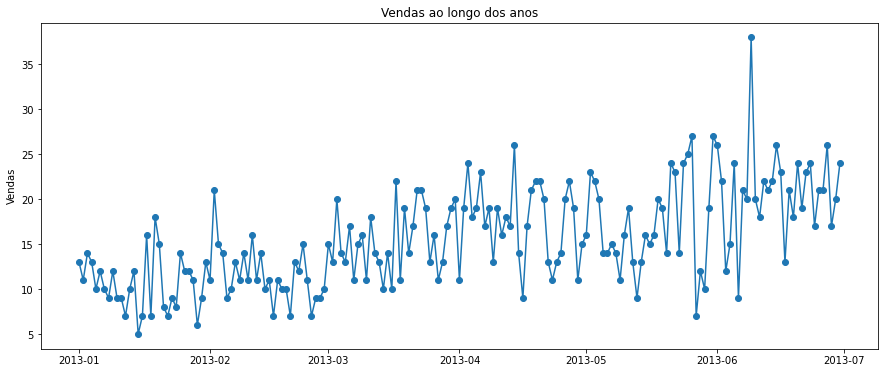

In [21]:
#Carregando a biblioteca de vizualisação:
import matplotlib.pyplot as plt

#Criando uma cópia do dataframe original:
df2 = df.copy()

#Definindo apenas o item 1 da store 1:
df2 = df2[df2['store']==1] 
df2 = df2[df2['item']==1]

#Transformando a coluna date no formato datetime:
df2['date'] = pd.to_datetime(df2['date'], errors='coerce' )

#Setando a coluna date como index:
df2.set_index('date', inplace=True)

#Criando o gráfico:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df2.loc['2013-01':'2013-06', 'sales'], marker='o', linestyle='-')
ax.set_ylabel('Vendas')
ax.set_title('Vendas ao longo dos anos')

# 4-2 Resampling

O resampling é uma função que conseguimos acessar intervalos diferentes da indformação, semelhante ao loc, mas con funções de tempo já pré definidas chamadas de "offset aliases"

A lista completa está aqui:
https://www.codegrepper.com/code-examples/python/offset+aliases+pandas

*** Um detalhe que eu vou colocar, quando se estuda séries temporais, muitos usam as funções pd.date_range e pd.Dataframe e para aquilo funcionar somente usando loops/tuplas, creio que tentei de inumerás maneiras até entender isso, nesse artigo eu não vou usar, mas fica a dica caso você esteja apanhando muito.

Dentro do date_range existe o parametro "freq = " e "periods" e nisso você seta os intervalos que você deseja, usando o resample você já tem os intervalos de tempo já pré-definidos. 

In [22]:
g = df1.resample('Y').sales

print(g.head(1))

date
2013-01-01    13.0
2014-01-01     9.0
2015-01-01    11.0
2016-01-01    21.0
2017-01-01    19.0
2018-01-01     NaN
Name: sales, dtype: float64


Eu defini a reamostragem (resample) com a frequência de ano (Y) e logo após eu usei o .head(1), o comando head normalmente irá retornar os cinco primeiros resultados, nesse caso ficaria os cinco primeiros resultados de cada ano, por isso eu coloquei o 1, se  tivesse usado 2 então teria retornado os dois primeiros resultados de cada ano “2013-01-01” e “2013-01-02”.

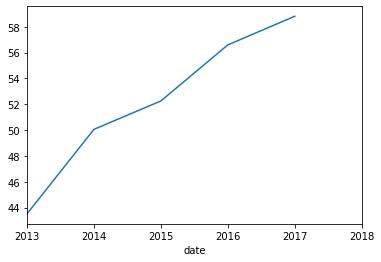

In [23]:
g = df1.resample('Y').sales.mean().plot()

Como podem ver também podemos já usar o resample em relação as vendas (sales), vendo a média e vendo tudo como gráfico, e muitras outras coisas.

In [24]:
gat = df1.resample('M').sales

print(gat.head(1))

date
2013-01-01    13.0
2013-02-01    11.0
2013-03-01    15.0
2013-04-01    11.0
2013-05-01    16.0
              ... 
2017-11-01    16.0
2017-12-01    19.0
2018-01-01     NaN
2018-02-01     NaN
2018-03-01     NaN
Name: sales, Length: 63, dtype: float64


Acima usamos o "M" que vem de mês, podemos ver os resultados do primeiro dia de cada mês de cada ano.

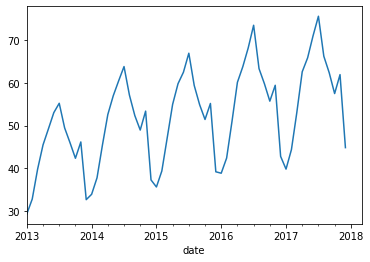

In [25]:
gat = df1.resample('M').sales.mean().plot()

In [26]:
gat = df1.resample('W').sales

print(gat.head(1))

date
2013-01-01    13.0
2013-01-07    10.0
2013-01-14    12.0
2013-01-21     8.0
2013-01-28    11.0
              ... 
2018-02-26     NaN
2018-03-05     NaN
2018-03-12     NaN
2018-03-19     NaN
2018-03-26     NaN
Name: sales, Length: 274, dtype: float64


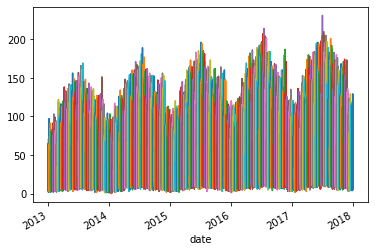

In [27]:
gat = df1.resample('W').sales.plot()

Acima podemos ver os resultados semanalmente (a cada sete dias). Esse dataset é grande.

# Agora vamos juntar tudo o que vimos a cima em um só gráfico:

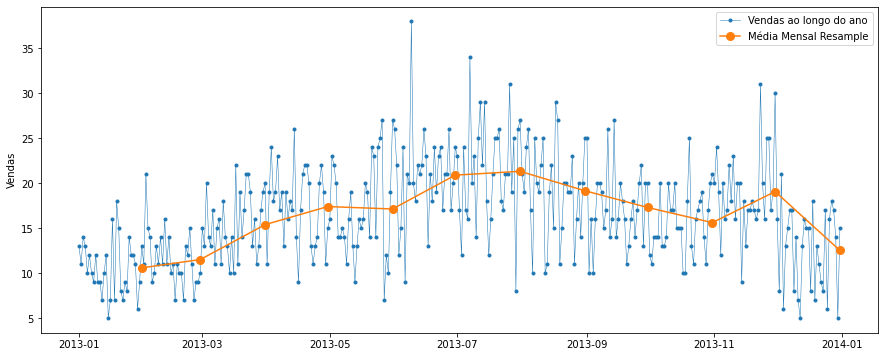

In [28]:
# Carregamos a biblioteca matplotlib para ver os gráficos:
import matplotlib.pyplot as plt

#Criando uma cópia do dataframe original:
df3 = df.copy()

#Definindo apenas o item 1 da store 1:
df3 = df3[df3['store']==1] 
df3 = df3[df3['item']==1]

#Transformando a coluna date no formato datetime:
df3['date'] = pd.to_datetime(df3['date'], errors='coerce' )

#Setando a coluna date como index:
df3.set_index('date', inplace=True)


# Aqui eu crio a variável "sales_resample_month" e dentro do dele usando o resample descubro a média de vendas por ano.
sales_resample_month_mean = df3.resample('M').sales.mean()

# Aqui é a range de data que iremos usar com o comando loc:
start, end = '2013-01', '2013-12'

# Criamos o gráfico e colocamos ele no tamanho 15,6
fig, ax = plt.subplots(figsize=(15,6))

#Série de tempo original:
ax.plot(df3.loc[start : end, 'sales'],
marker='.', linestyle='-', linewidth=0.5, label='Vendas ao longo do ano')

# Série de tempo com o resample:
ax.plot(sales_resample_month_mean.loc[start : end],
marker='o', markersize=8, linestyle='-', label='Média Mensal Resample')

# Titulo:
ax.set_ylabel('Vendas')
ax.legend();

Acima podemos ver a média mensal das vendas sobre as vendas ao longo do ano de 2013 até 2014.

Também se pode fazer outras combinações, ao longo do ano todo (2013 até 2018) podendo se ver as médias anuais, semanais, diarias, e uma infinidade de combinações: https://www.codegrepper.com/code-examples/python/offset+aliases+pandas

Como também usar como parametro não a média, mas também o sum(), median() e muitos outros.

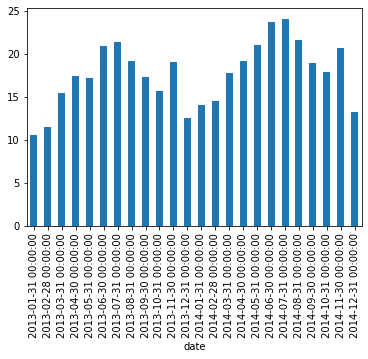

In [29]:
#Criando uma cópia do dataframe original:
df3 = df.copy()

#Definindo apenas o item 1 da store 1:
df3 = df3[df3['store']==1] 
df3 = df3[df3['item']==1]

#Transformando a coluna date no formato datetime:
df3['date'] = pd.to_datetime(df3['date'], errors='coerce' )

#Setando a coluna date como index:
df3.set_index('date', inplace=True)

fig, ax = plt.subplots()
df3.sales.loc['2013-01':'2014-12'].resample("M").mean().plot.bar()

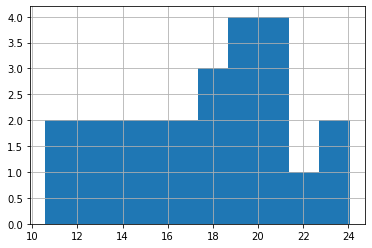

In [31]:
df3.sales.loc['2013-01':'2014-12'].resample("M").mean().hist()